In [1]:
# Importing libraries
import re
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
warnings.filterwarnings("ignore")

C:\Users\kukud\AppData\Local\Temp\ipykernel_40216\412740132.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importing the dataset
df = pd.read_csv('Traffic_Violations.csv', low_memory=False)
df_full = pd.read_csv('Traffic_Violations.csv', low_memory=False)
# Giving the dimension information
print('Dataframe dimensions:', df.shape)
#____________________________________________________________
# Giving some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
# tab_info = pd.concat([tab_info, pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'})])
# tab_info=tab_info.concat(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
#                          .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (1910247, 43)


,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
column type,object,object,object,object,object,object,object,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object,object,object,object,object,bool,object,object,object,object,object,object,object


In [3]:
df1 = df[['Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License']]
df1.head()

,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License
0,No,No,No,No,No,No
1,No,No,No,No,No,No
2,No,No,No,No,No,No
3,No,No,No,Yes,No,No
4,No,No,No,No,No,No


In [4]:

# Let's see what we have
df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,17-107(a1),NaN,NaN,MD,02 - Automobile,2007.0,CHEV,CRUZ,BLACK,Citation,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-411(f),NaN,NaN,MD,02 - Automobile,2013.0,TOYOTA,COROLLA,RED,Citation,13-409(b),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
2,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-411(f),NaN,NaN,MD,02 - Automobile,2013.0,TOYOTA,COROLLA,RED,Citation,13-411(f),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
3,4d37fa99-0df3-4a56-9ba6-692bce894a34,11/26/2023,09:16:00,MCP,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,39.058378,-77.049652,No,No,No,Yes,No,No,No,No,No,No,Yes,Property Only,Arrest,Incident to Arrest,20-103(b),Both,Stop,MD,02 - Automobile,2004.0,TOYOTA,HB,SILVER,Citation,21-902(a1i),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0583783333333, -77.0496516666667)"
4,3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49,11/25/2023,05:45:00,MCP,"4th District, Wheaton",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,OLNEY LAYTONSVILLE RD @ FIELDCREST RD,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2022.0,MITSUBISHI,ECLIPSE CROSS,BLACK,Citation,21-901.1(a),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)


SeqID                            0
Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                     10
Location                         4
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
Search Conducted            724892
Search Disposition         1825091
Search Outcome              744160
Search Reason              1825091
Search Reason For Stop      725170
Search Type                1825099
Search Arrest Reason       1851863
State                           59
VehicleType                      0
Year                

In [6]:
df.drop(columns=['Search Conducted', 'Search Disposition', 'Search Outcome', 'Search Reason', 'Search Reason For Stop', 'Search Type'], inplace=True)
df.isnull().sum()

SeqID                            0
Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                     10
Location                         4
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
Search Arrest Reason       1851863
State                           59
VehicleType                      0
Year                         10421
Make                            68
Model                          217
Color                        21743
Violation Type                   0
Charge                           0
Article             

In [7]:
# Check for outliers in the 'Latitude' column
latitude_outliers = df[(df['Latitude'] < -90) | (df['Latitude'] > 90)]

# Check for outliers in the 'Longitude' column
longitude_outliers = df[(df['Longitude'] < -180) | (df['Longitude'] > 180)]

# Print the outliers
print("Latitude outliers:")
print(latitude_outliers)

print("\nLongitude outliers:")
print(longitude_outliers)

Latitude outliers:
Empty DataFrame
Columns: [SeqID, Date Of Stop, Time Of Stop, Agency, SubAgency, Description, Location, Latitude, Longitude, Accident, Belts, Personal Injury, Property Damage, Fatal, Commercial License, HAZMAT, Commercial Vehicle, Alcohol, Work Zone, Search Arrest Reason, State, VehicleType, Year, Make, Model, Color, Violation Type, Charge, Article, Contributed To Accident, Race, Gender, Driver City, Driver State, DL State, Arrest Type, Geolocation]
Index: []

Longitude outliers:
Empty DataFrame
Columns: [SeqID, Date Of Stop, Time Of Stop, Agency, SubAgency, Description, Location, Latitude, Longitude, Accident, Belts, Personal Injury, Property Damage, Fatal, Commercial License, HAZMAT, Commercial Vehicle, Alcohol, Work Zone, Search Arrest Reason, State, VehicleType, Year, Make, Model, Color, Violation Type, Charge, Article, Contributed To Accident, Race, Gender, Driver City, Driver State, DL State, Arrest Type, Geolocation]
Index: []


In [8]:
# Check unique values in the 'Accident' column
unique_accidents = df['Accident'].unique()
print("Unique values in the 'Accident' column:")
print(unique_accidents)


Unique values in the 'Accident' column:
['No' 'Yes']


In [9]:
# Counting the violations by State
df = df[df.State.notnull()]
aggResult = df.groupby(by=['State'])['Fatal'].agg([('Count', 'size')])
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(by = 'Count', ascending=False)
aggResult = aggResult.reset_index()
aggResult.head(20)

,State,Count
0,MD,1660031
1,VA,88209
2,DC,48067
3,XX,14909
4,PA,13415
5,TX,9560
6,FL,9159
7,WV,7834
8,NC,7037
9,NY,6118


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


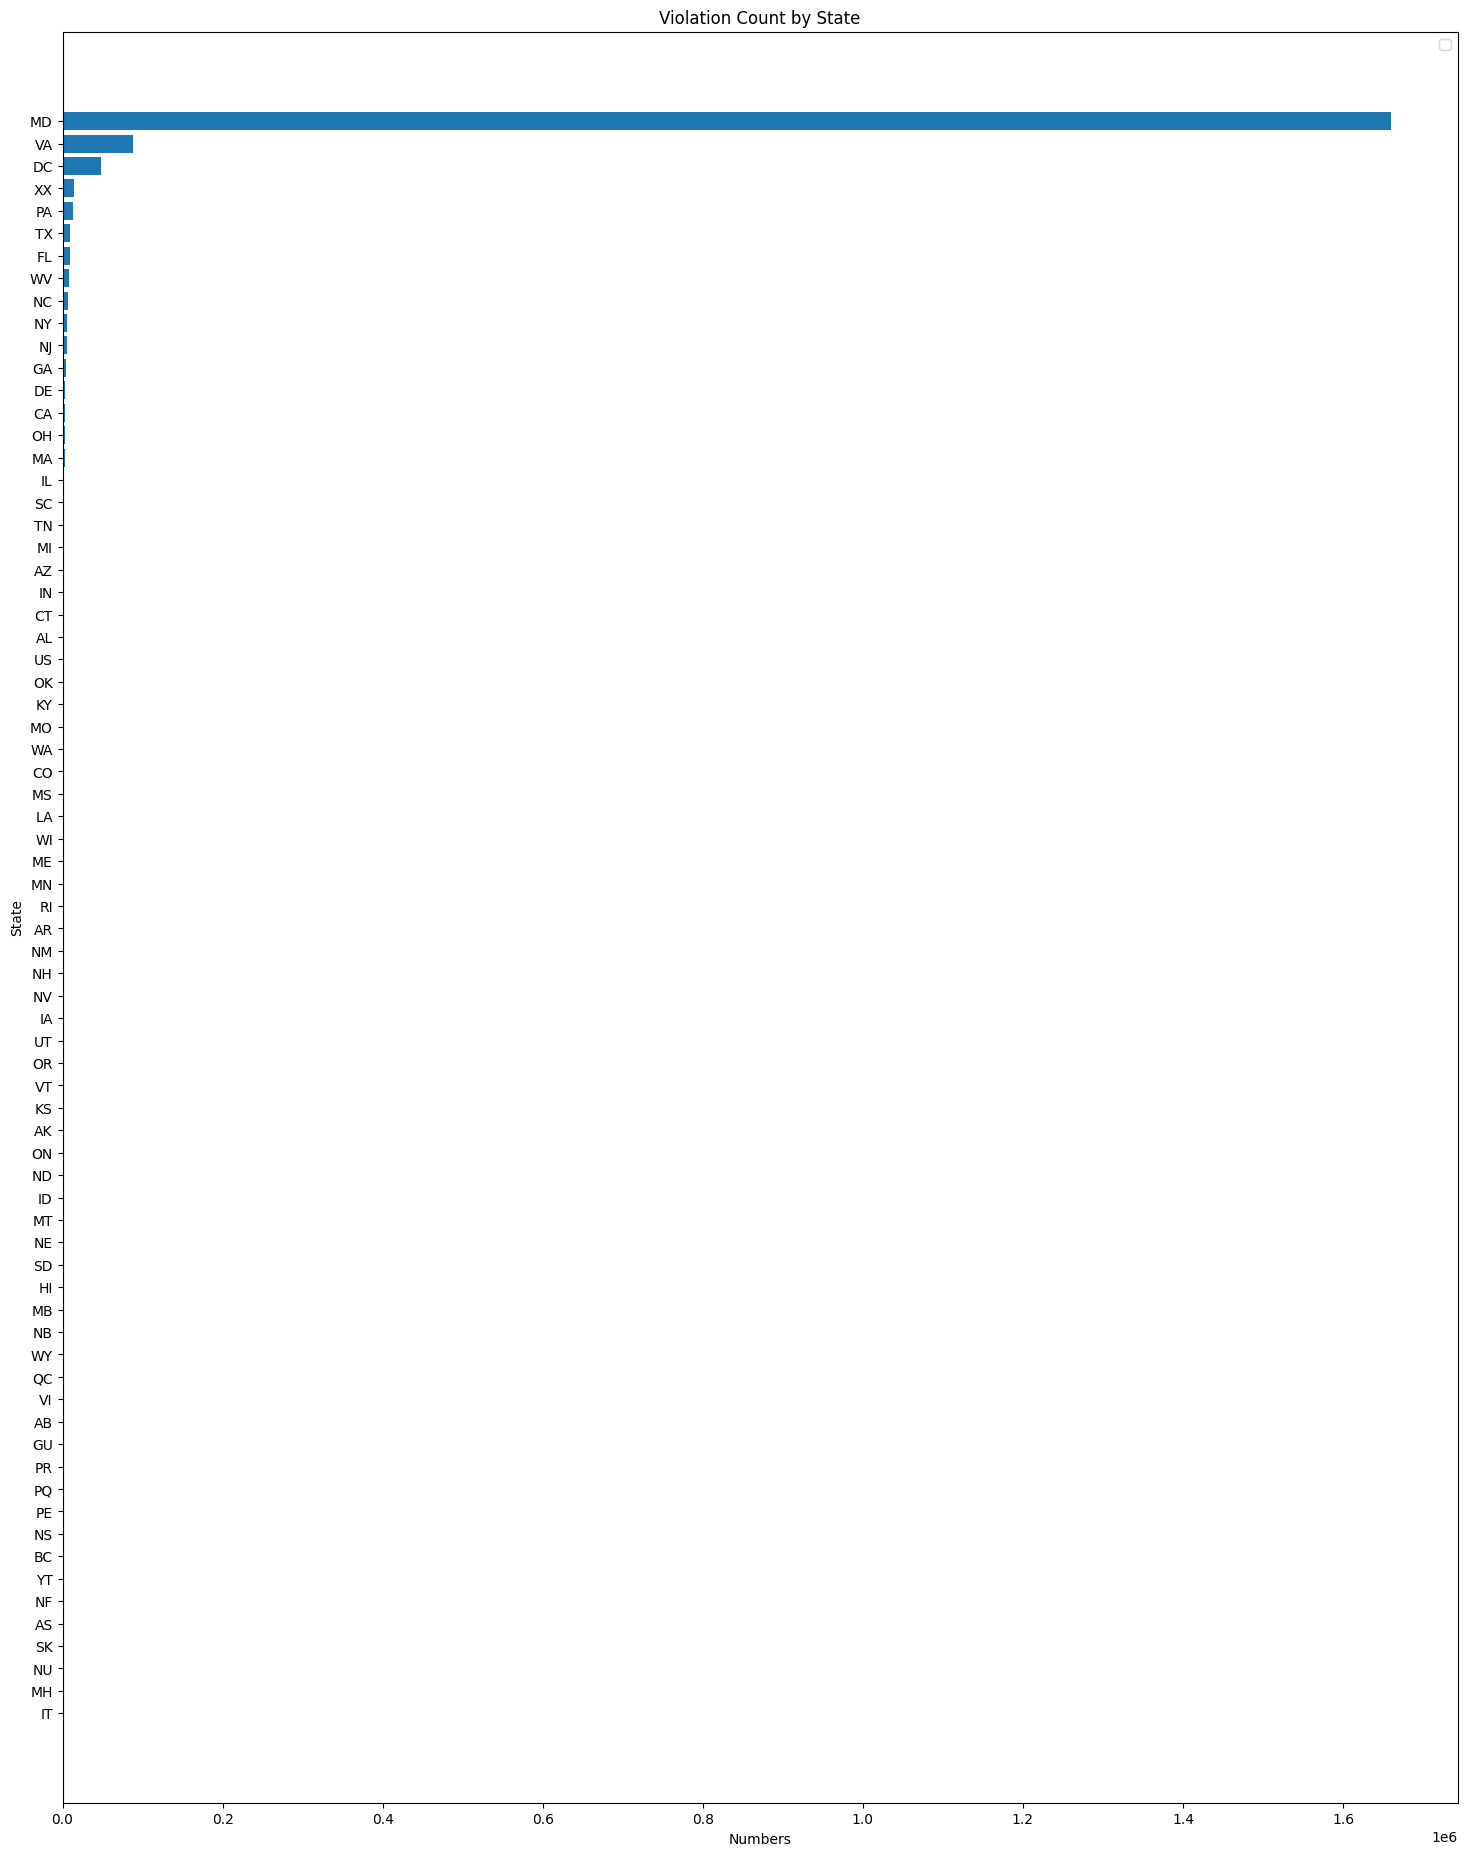

In [10]:
# Visualizing the result
fig = plt.figure(figsize=(18,23))
x = aggResult['Count']
y = len(aggResult.index) - aggResult.index #swap high and low
labels = aggResult['State']

#plt.scatter(x, y, color='g', label = 'Violation Count')
plt.barh(y, x)
plt.yticks(y, labels)

plt.xlabel('Numbers')
plt.ylabel('State')
plt.title('Violation Count by State')
plt.legend()
plt.show()

In [11]:
# Counting the violations by Maker
df = df.dropna(axis = 0, how='any')
aggResult = df.groupby(by=['Make'])['Fatal'].agg([('Count', 'size')])
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(by = 'Count', ascending=False)
aggResult = aggResult[aggResult['Count'] >500]
aggResult = aggResult.reset_index()
aggResult.head(20)

,Make,Count
0,HONDA,7583
1,TOYOTA,6709
2,FORD,5828
3,NISSAN,3888
4,CHEVROLET,2307
5,DODGE,2056
6,ACURA,1795
7,CHEVY,1674
8,TOYT,1635
9,JEEP,1506


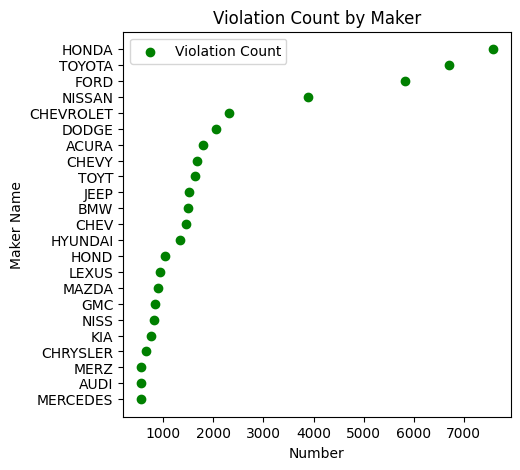

In [12]:

# Visualization the result
fig = plt.figure(figsize=(5,5))
x = aggResult['Count']
y = len(aggResult.index) - aggResult.index 
labels = aggResult['Make']
plt.scatter(x, y, color='g', label = 'Violation Count')
plt.yticks(y, labels)

plt.xlabel('Number')
plt.ylabel('Maker Name')
plt.title('Violation Count by Maker')
plt.legend()
plt.show()

In [13]:
# Counting the violations by Model
aggResult = df.groupby(by=['Model'])['Fatal'].agg([('Count', 'size')])
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(by = 'Count', ascending=False)
aggResult = aggResult[aggResult['Count'] >1000]
aggResult = aggResult.reset_index()
aggResult.head(20)

,Model,Count
0,4S,3685
1,CIVIC,3043
2,ACCORD,2731
3,CAMRY,1908
4,COROLLA,1857
5,ALTIMA,1629
6,TK,1579
7,4D,1024


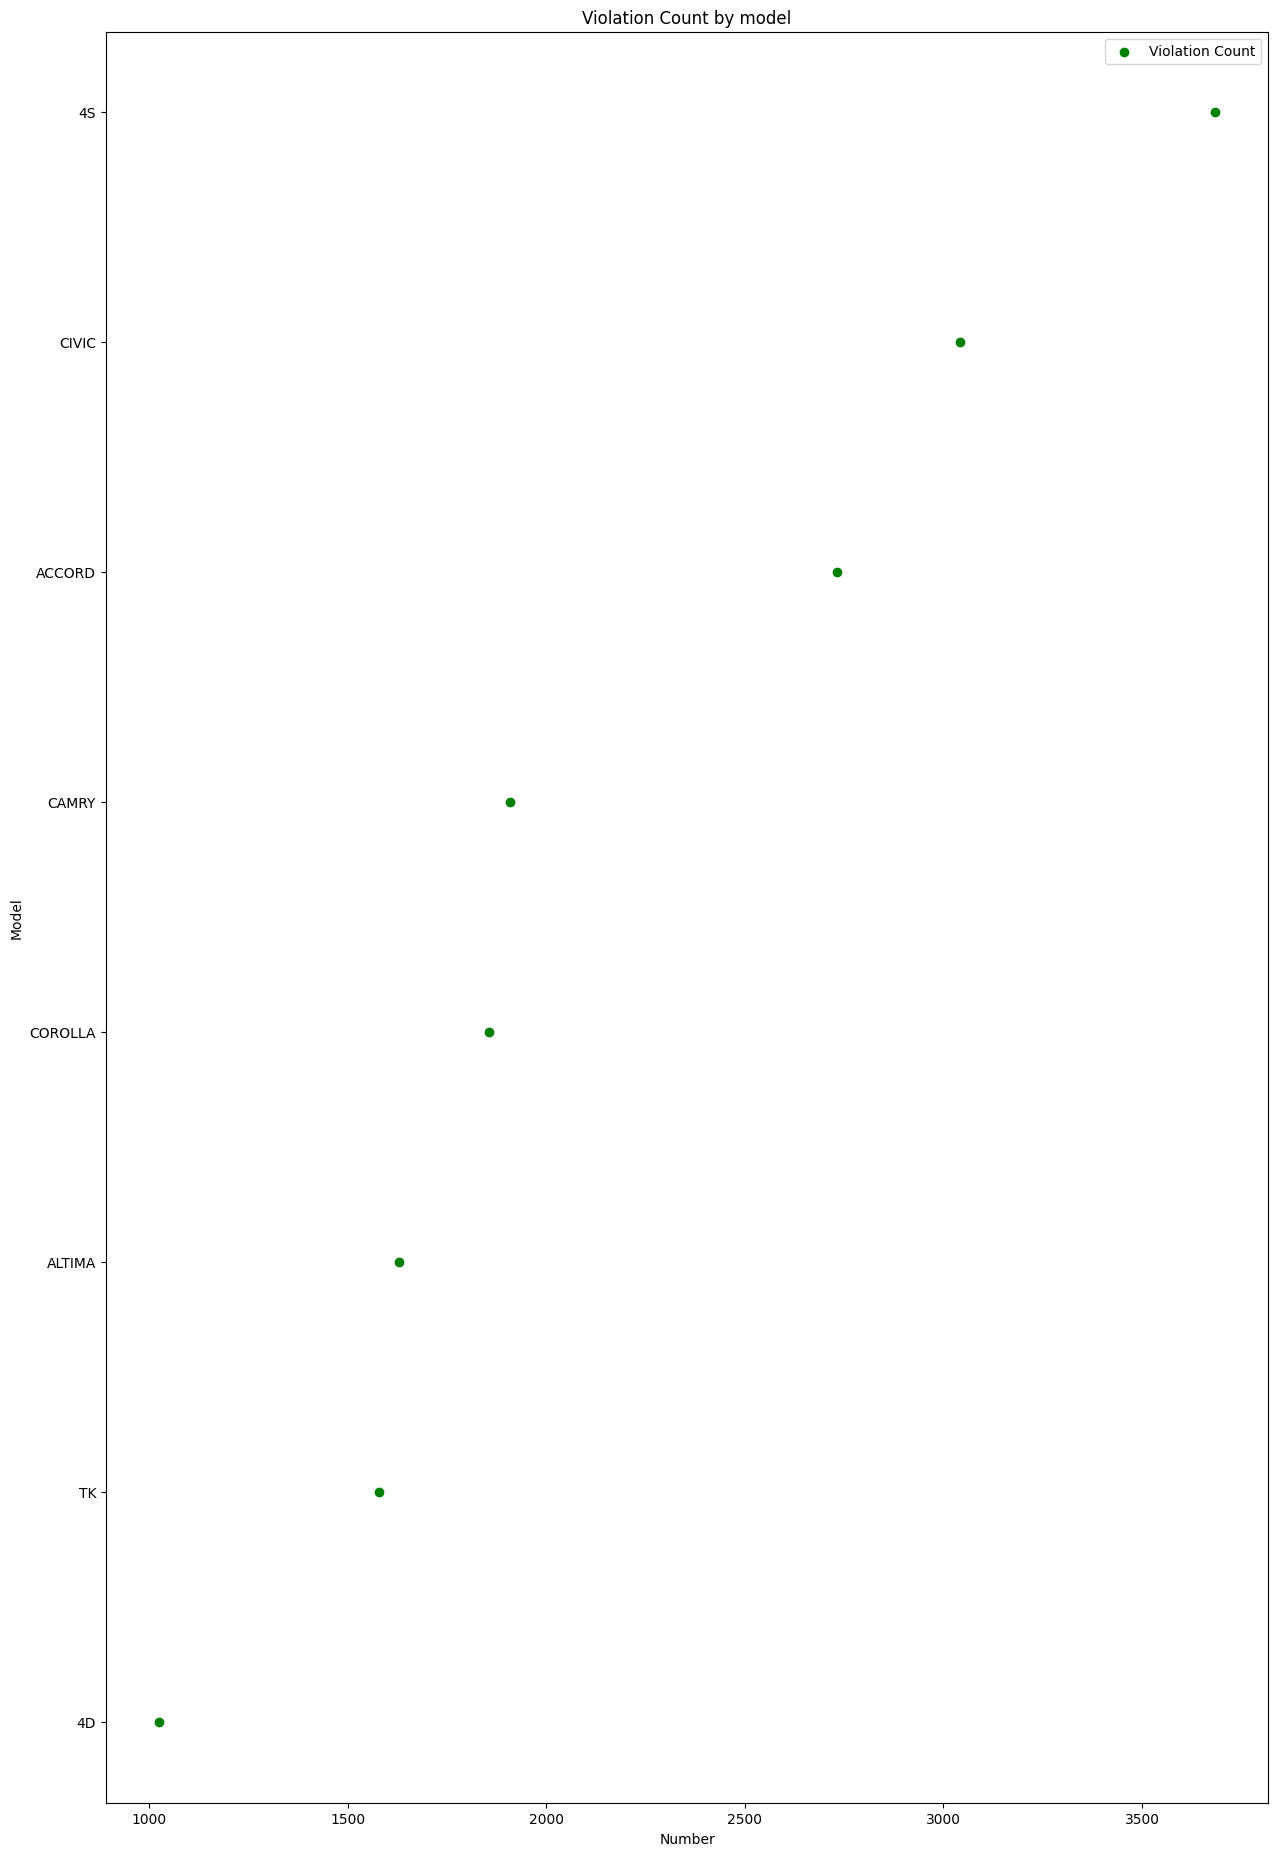

In [14]:
# Visualization the results
fig = plt.figure(figsize=(15,23))
x = aggResult['Count']
y = len(aggResult.index) - aggResult.index
labels = aggResult['Model']

plt.scatter(x, y, color='g', label = 'Violation Count')
plt.yticks(y, labels)

plt.xlabel('Number')
plt.ylabel('Model')
plt.title('Violation Count by model')
plt.legend()
plt.show()

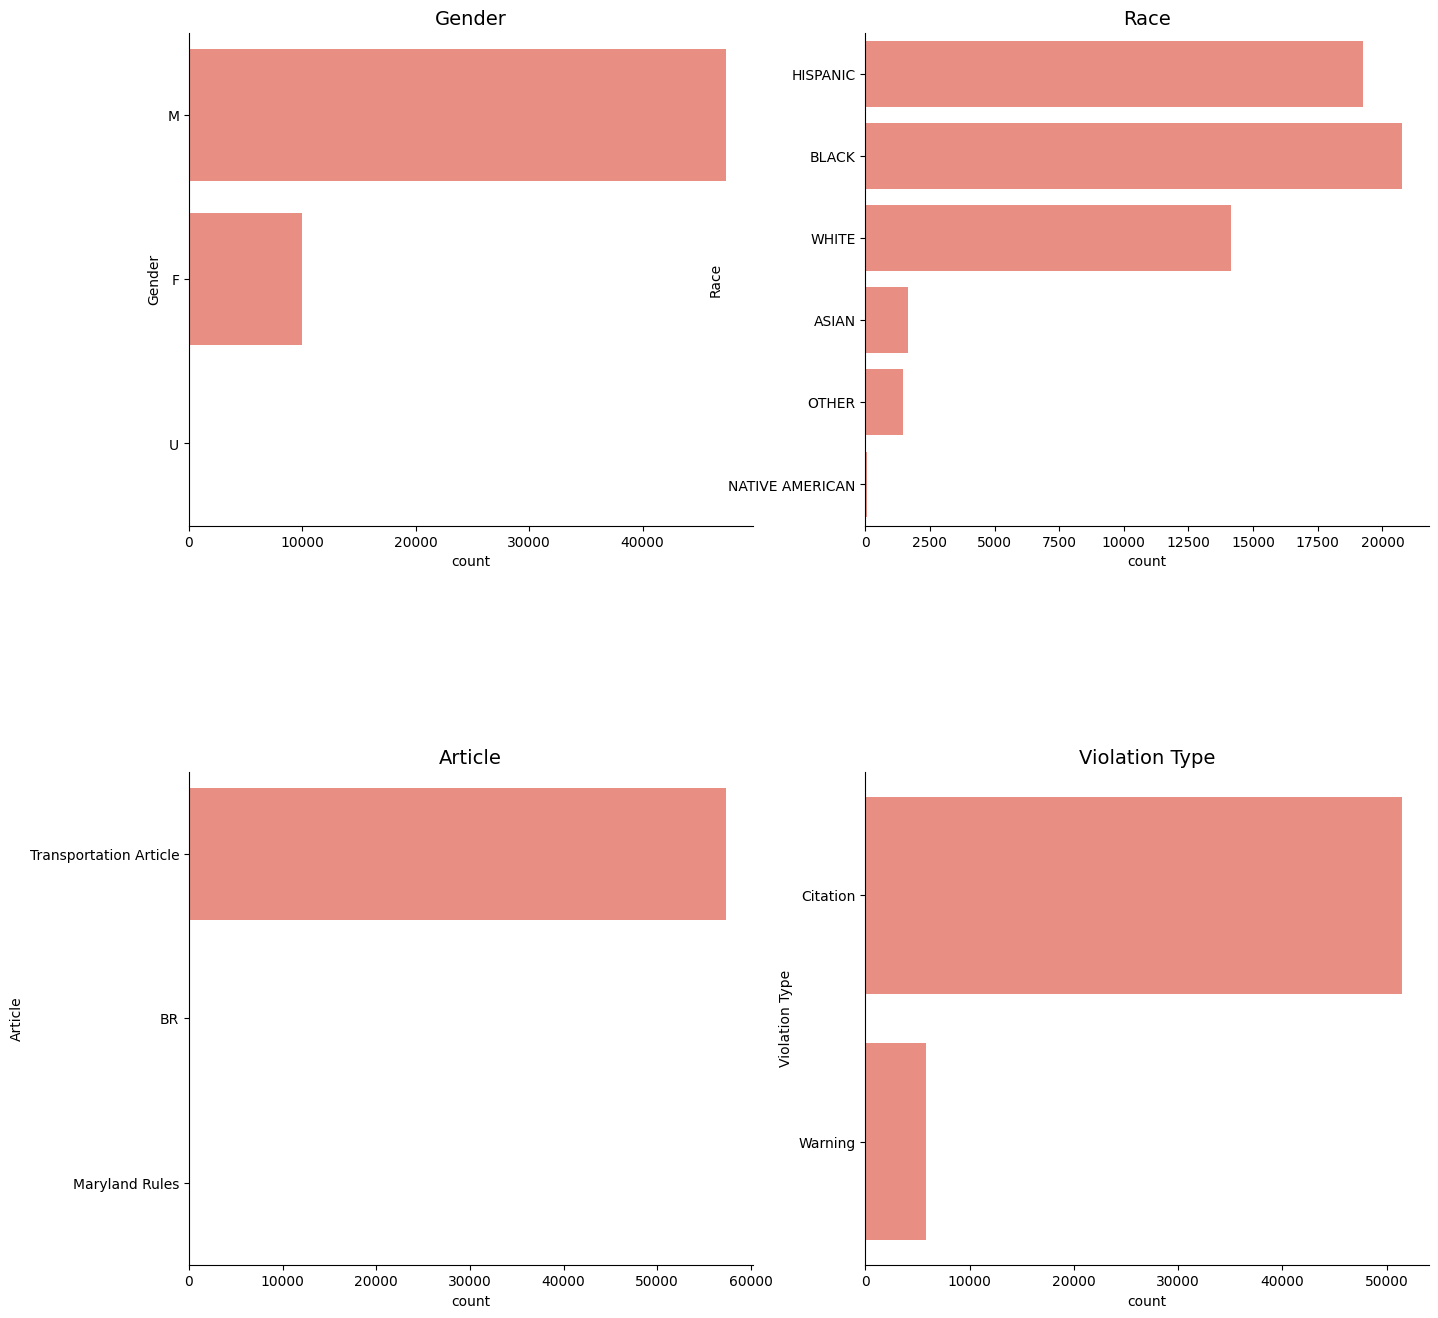

In [15]:
#Violation Kinds

f, axarr = plt.subplots(2, 2, figsize=(16, 16))

f.subplots_adjust(hspace=0.5)

sns.countplot(df['Gender'], ax=axarr[0][0], color='salmon')
axarr[0][0].set_title("Gender", fontsize=14)

sns.countplot(df['Race'], ax=axarr[0][1], color='salmon')
axarr[0][1].set_title("Race", fontsize=14)

sns.countplot(df['Article'], ax=axarr[1][0], color='salmon')
axarr[1][0].set_title("Article", fontsize=14)

sns.countplot(df['Violation Type'], ax=axarr[1][1], color='salmon')
axarr[1][1].set_title("Violation Type", fontsize=14)

sns.despine()

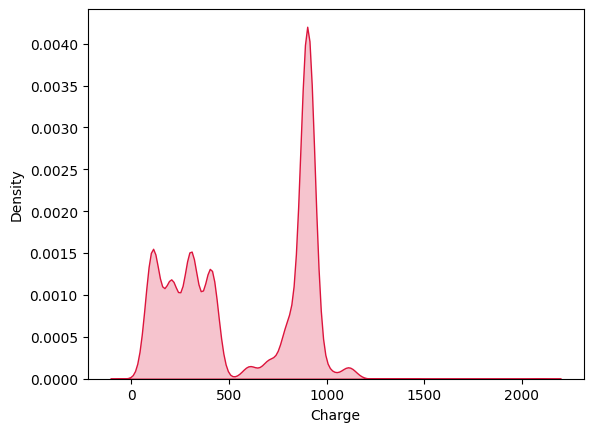

In [16]:
# Let's see the Charge distribution
df['Charge'] = df['Charge'].apply(lambda x: re.findall(r"\d+\.?\d*", x)[1]).astype(float)
kde_kwargs = {'color': 'crimson', 'shade': True}
vis1 = sns.kdeplot(df['Charge'], **kde_kwargs)

Text(0.5, 1.0, 'Fatal')

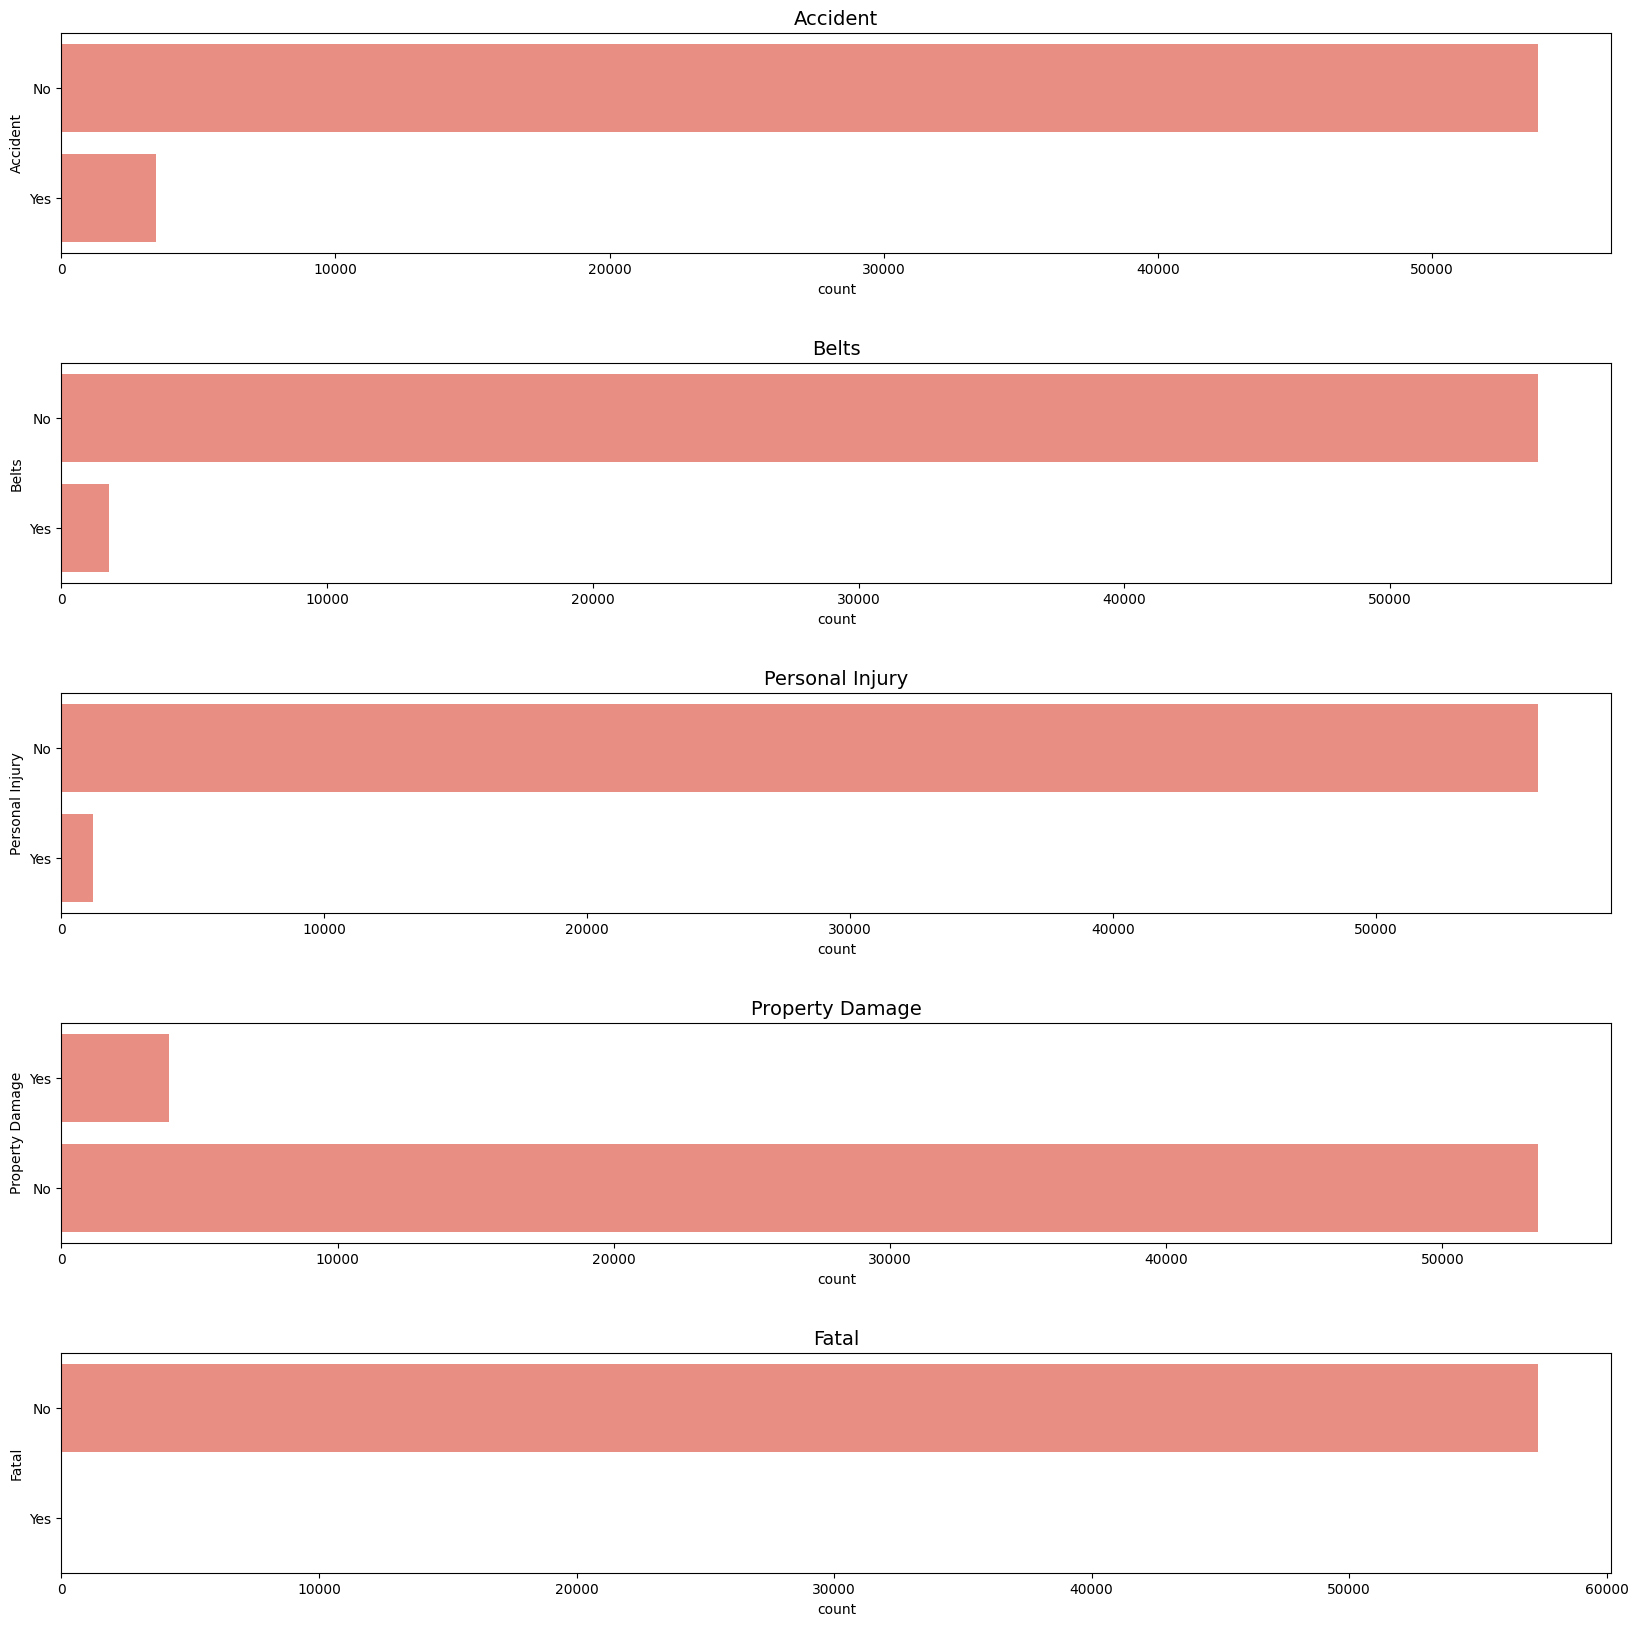

In [17]:
# Let's see the violations kinds
f, axarr = plt.subplots(5, 1, figsize=(20, 20))

f.subplots_adjust(hspace=0.5)

sns.countplot(df['Accident'], ax=axarr[0], color='salmon')
axarr[0].set_title("Accident", fontsize=14)

sns.countplot(df['Belts'], ax=axarr[1], color='salmon')
axarr[1].set_title("Belts", fontsize=14)

sns.countplot(df['Personal Injury'], ax=axarr[2], color='salmon')
axarr[2].set_title("Personal Injury", fontsize=14)

sns.countplot(df['Property Damage'], ax=axarr[3], color='salmon')
axarr[3].set_title("Property Damage", fontsize=14)

sns.countplot(df['Fatal'], ax=axarr[4], color='salmon')
axarr[4].set_title("Fatal", fontsize=14)


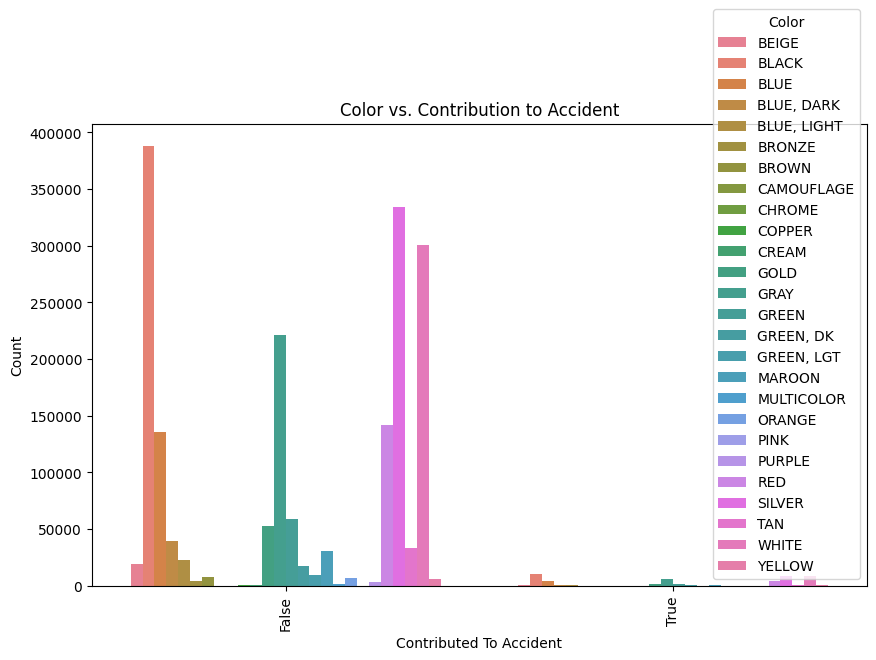

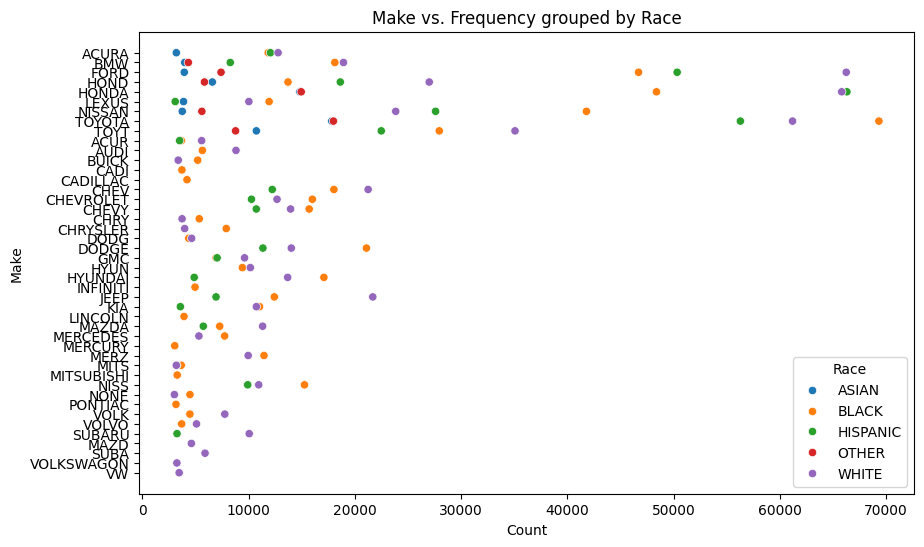

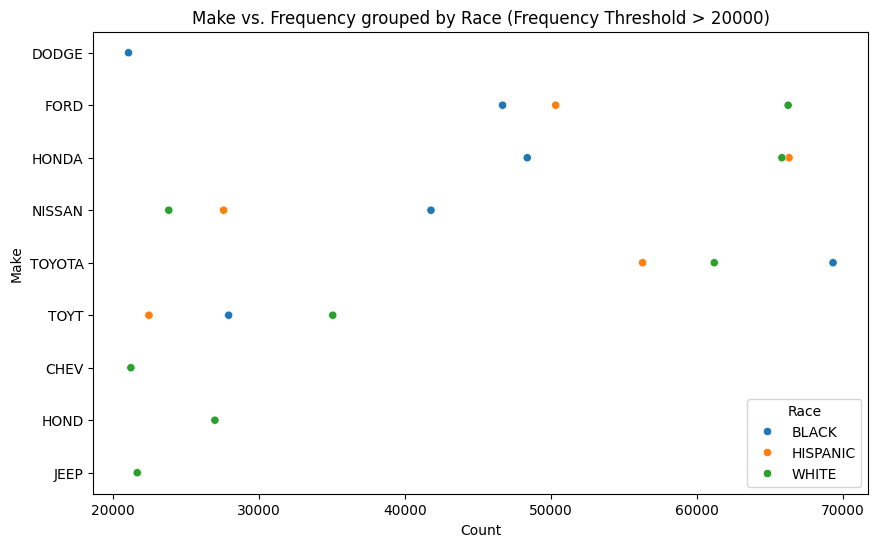

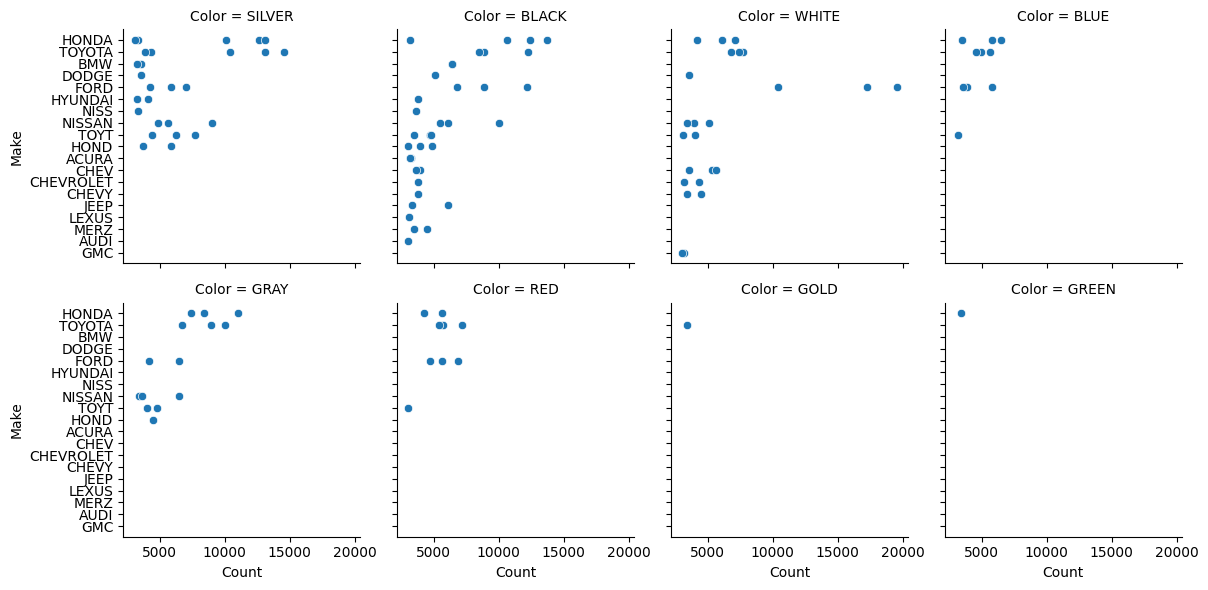

In [18]:
# Load data
TrafficViolation = pd.read_csv('Traffic_Violations.csv')

# Count violations by Race and Make
RaceModel = TrafficViolation.groupby(['Race', 'Make']).size().reset_index(name='Count')

# Count violations by Contribution to accident and Color
ColourViolation = TrafficViolation.groupby(['Contributed To Accident', 'Color']).size().reset_index(name='Count')

# Plot Color vs. Contribution to Accident
plt.figure(figsize=(10, 6))
sns.barplot(data=ColourViolation, x='Contributed To Accident', y='Count', hue='Color')
plt.xticks(rotation=90)
plt.title('Color vs. Contribution to Accident')
plt.show()

# Plot Make vs. Frequency grouped by Race
plt.figure(figsize=(10, 6))
sns.scatterplot(data=RaceModel[RaceModel['Count'] > 3000], x='Count', y='Make', hue='Race')
plt.title('Make vs. Frequency grouped by Race')
plt.show()

# Plot Make vs. Frequency grouped by Race with frequency threshold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=RaceModel[RaceModel['Count'] > 20000], x='Count', y='Make', hue='Race')
plt.title('Make vs. Frequency grouped by Race (Frequency Threshold > 20000)')
plt.show()

# Count violations by Race, Make, and Color
RaceModelColor = TrafficViolation.groupby(['Race', 'Make', 'Color']).size().reset_index(name='Count')

# Plot Make vs. Frequency grouped by Race and Color
g = sns.FacetGrid(data=RaceModelColor[RaceModelColor['Count'] > 3000], col='Color', col_wrap=4)
g.map(sns.scatterplot, 'Count', 'Make')
g.add_legend()
plt.show()





In [19]:
print(RaceModelColor.head())
print(RaceModelColor.info())


    Race             Make       Color  Count
0  ASIAN  1VWBP7A37DC1265      SILVER      1
1  ASIAN             2013       WHITE      1
2  ASIAN             2016  BLUE, DARK     14
3  ASIAN             2019        BLUE      1
4  ASIAN  2T3P1RFV9LW1182       BLACK      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23855 entries, 0 to 23854
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Race    23855 non-null  object
 1   Make    23855 non-null  object
 2   Color   23855 non-null  object
 3   Count   23855 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 745.6+ KB
None


In [20]:
print(RaceModelColor['Race'].unique())


['ASIAN' 'BLACK' 'HISPANIC' 'NATIVE AMERICAN' 'OTHER' 'WHITE']


In [21]:
# Count violations by Race, Make, and Color
RaceModelColor = TrafficViolation.groupby(['Race', 'Make', 'Color']).size().reset_index(name='Count')

# Display the result
print(RaceModelColor)  


        Race             Make        Color  Count
0      ASIAN  1VWBP7A37DC1265       SILVER      1
1      ASIAN             2013        WHITE      1
2      ASIAN             2016   BLUE, DARK     14
3      ASIAN             2019         BLUE      1
4      ASIAN  2T3P1RFV9LW1182        BLACK      2
...      ...              ...          ...    ...
23850  WHITE             ZHNG          RED      1
23851  WHITE             ZNEN       SILVER      4
23852  WHITE             ZUMA  BLUE, LIGHT      6
23853  WHITE          ZUMMERQ        GREEN      4
23854  WHITE           ]LEXUS       SILVER      1

[23855 rows x 4 columns]


In [22]:
df1.head()

,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License
0,No,No,No,No,No,No
1,No,No,No,No,No,No
2,No,No,No,No,No,No
3,No,No,No,Yes,No,No
4,No,No,No,No,No,No


In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df1.select_dtypes(include='object').columns:
    df1[column + '_encoded'] = label_encoder.fit_transform(df1[column])

df1.head()

,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,Accident_encoded,Belts_encoded,Personal Injury_encoded,Property Damage_encoded,Fatal_encoded,Commercial License_encoded
0,No,No,No,No,No,No,0,0,0,0,0,0
1,No,No,No,No,No,No,0,0,0,0,0,0
2,No,No,No,No,No,No,0,0,0,0,0,0
3,No,No,No,Yes,No,No,0,0,0,1,0,0
4,No,No,No,No,No,No,0,0,0,0,0,0


In [24]:
df1.drop(columns=['Accident', 'Belts', 'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License'], inplace=True)
df1.head()

,Accident_encoded,Belts_encoded,Personal Injury_encoded,Property Damage_encoded,Fatal_encoded,Commercial License_encoded
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = df1.Accident_encoded
X = df1.drop(columns = ['Accident_encoded'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LogisticRegression()
model1.fit(X_train, y_train)


LogisticRegression()

In [26]:
y_pred = model1.predict(X_test)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9724224577934826

Confusion Matrix:
 [[371004    491]
 [ 10045    510]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    371495
           1       0.51      0.05      0.09     10555

    accuracy                           0.97    382050
   macro avg       0.74      0.52      0.54    382050
weighted avg       0.96      0.97      0.96    382050



In [28]:
df1

,Accident_encoded,Belts_encoded,Personal Injury_encoded,Property Damage_encoded,Fatal_encoded,Commercial License_encoded
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
1910242,0,0,0,0,0,0
1910243,0,0,0,0,0,0
1910244,0,0,0,0,0,0
1910245,0,0,0,0,0,0


In [29]:
df2 = df1[['Accident_encoded', 'Belts_encoded', 'Fatal_encoded']]
df2.drop(df2.index[:1000000], inplace=True)
df2

,Accident_encoded,Belts_encoded,Fatal_encoded
1000000,0,1,0
1000001,0,0,0
1000002,0,0,0
1000003,0,1,0
1000004,0,0,0
...,...,...,...
1910242,0,0,0
1910243,0,0,0
1910244,0,0,0
1910245,0,0,0


In [30]:
model2 = LogisticRegression()

y1 = df1.Accident_encoded
X1 = df1.drop(columns = ['Accident_encoded'])
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

model2 = LogisticRegression()
model2.fit(X1_train, y1_train)

LogisticRegression()

In [31]:
y1_pred = model2.predict(X1_test)

print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.9724957466300223

Confusion Matrix:
 [[556546    730]
 [ 15032    767]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    557276
           1       0.51      0.05      0.09     15799

    accuracy                           0.97    573075
   macro avg       0.74      0.52      0.54    573075
weighted avg       0.96      0.97      0.96    573075



In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(X1_train, y1_train)

y2_pred = model3.predict(X1_test)

print("Accuracy:", accuracy_score(y1_test, y2_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y1_test, y2_pred))
print("\nClassification Report:\n", classification_report(y1_test, y2_pred))

Accuracy: 0.9724311826549753

Confusion Matrix:
 [[557276      0]
 [ 15799      0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    557276
           1       0.00      0.00      0.00     15799

    accuracy                           0.97    573075
   macro avg       0.49      0.50      0.49    573075
weighted avg       0.95      0.97      0.96    573075



In [33]:
df

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
3,4d37fa99-0df3-4a56-9ba6-692bce894a34,11/26/2023,09:16:00,MCP,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,39.058378,-77.049652,No,No,No,Yes,No,No,No,No,No,No,Stop,MD,02 - Automobile,2004.0,TOYOTA,HB,SILVER,Citation,902.0,Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0583783333333, -77.0496516666667)"
56,c7c5462e-b769-4a75-b818-db3387e17b90,04/30/2023,01:57:00,MCP,Headquarters and Special Operations,DRIVING VEH. WHILE IMPAIRED BY ALCOHOL,219 E DIAMOND AVE,39.149615,-77.233587,No,No,No,No,No,No,No,No,No,No,Stop,MD,02 - Automobile,2003.0,HONDA,CIVIC,WHITE,Citation,902.0,Transportation Article,False,HISPANIC,M,MONTGOMERY VILLAGE,MD,MD,B - Unmarked Patrol,"(39.149615, -77.2335866666667)"
57,c7c5462e-b769-4a75-b818-db3387e17b90,04/30/2023,01:57:00,MCP,Headquarters and Special Operations,DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,219 E DIAMOND AVE,39.149615,-77.233587,No,No,No,No,No,No,No,No,No,No,Stop,MD,02 - Automobile,2003.0,HONDA,CIVIC,WHITE,Citation,902.0,Transportation Article,False,HISPANIC,M,MONTGOMERY VILLAGE,MD,MD,B - Unmarked Patrol,"(39.149615, -77.2335866666667)"
58,c7c5462e-b769-4a75-b818-db3387e17b90,04/30/2023,01:57:00,MCP,Headquarters and Special Operations,DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,219 E DIAMOND AVE,39.149615,-77.233587,No,No,No,No,No,No,No,No,No,No,Stop,MD,02 - Automobile,2003.0,HONDA,CIVIC,WHITE,Citation,902.0,Transportation Article,False,HISPANIC,M,MONTGOMERY VILLAGE,MD,MD,B - Unmarked Patrol,"(39.149615, -77.2335866666667)"
59,c7c5462e-b769-4a75-b818-db3387e17b90,04/30/2023,01:57:00,MCP,Headquarters and Special Operations,NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,219 E DIAMOND AVE,39.149615,-77.233587,No,No,No,No,No,No,No,No,No,No,Stop,MD,02 - Automobile,2003.0,HONDA,CIVIC,WHITE,Citation,901.1,Transportation Article,False,HISPANIC,M,MONTGOMERY VILLAGE,MD,MD,B - Unmarked Patrol,"(39.149615, -77.2335866666667)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897718,f5762625-15f0-408b-838a-194d08712166,02/15/2022,18:08:00,MCP,"1st District, Rockville",DRIVING VEH. WHILE IMPAIRED BY ALCOHOL,N WASHINGTON ST. / WOOD LN.,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,Stop,MD,02 - Automobile,2017.0,FORD,F150,BLACK,Warning,902.0,Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1897896,3766d64e-cf72-4b6f-b483-1d1da51989a6,04/16/2019,19:27:00,MCP,"4th District, Wheaton",OPERATING VEHICLE ON HIGHWAY WITH UNAUTHORIZED...,BELVEDERE BLVD @ MCKENNEY AVE,39.018985,-77.046282,No,No,No,No,No,No,No,No,No,No,Search,MD,02 - Automobile,2005.0,MAZD,4D,BLACK,Warning,406.0,Transportation Article,False,BLACK,M,SILVER SPRING,MD,MD,B - Unmarked Patrol,"(39.018985, -77.0462816666667)"
1898232,6bd91012-c89d-4725-9a3b-7a71ddd8415e,06/10/2022,23:42:00,MCP,"6th District, Gaithersburg / Montgomery Village",DRIVER FAILURE TO OBEY DESIGNATED LANE DIRECTIONS,355 @ S SUMMIT AVE,39.149757,-77.233882,No,No,No,No,No,No,No,No,No,No,Stop,MD,02 - Automobile,2020.0,CHRYSLER,300,WHITE,Warning,309.0,Transportation Article,False,BLACK,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1497569666667, -77.2338815166667)"
1899377,ee972b40-3a3a-46b8-b79a-26d01f9bc373,04/20/2015,13:13:00,MCP,"1st District, Rockville",FAILURE TO STOP WHEN ENTERING HIGHWAY,5800 BLOCK OF RANDOLPH RD,39.049992,-77.108320,No,No,No,No,No,No,No,No,No,No,Search,MD,02 - Automobile,2012.0,NISSAN,ALTIMA,"BLUE, LIGHT",Warning,404.0,Transportation Article,Fal

In [34]:
df_full

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,Search Conducted,Search Disposition,Search Outcome,Search Reason,Search Reason For Stop,Search Type,Search Arrest Reason,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca,05/01/2023,23:11:00,MCP,"3rd District, Silver Spring",OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY,BRIGGS CHANEY RD @ COLUMIBA PIKE,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,17-107(a1),NaN,NaN,MD,02 - Automobile,2007.0,CHEV,CRUZ,BLACK,Citation,13-401(b1),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-411(f),NaN,NaN,MD,02 - Automobile,2013.0,TOYOTA,COROLLA,RED,Citation,13-409(b),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
2,9be35886-e00c-49c2-8f27-2f6307696a17,11/25/2023,00:20:00,MCP,"6th District, Gaithersburg / Montgomery Village",DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B...,GEORGIA AVE / WEISMAN RD,39.052962,-77.051304,No,No,No,No,No,No,No,No,No,No,No,NaN,Citation,NaN,13-411(f),NaN,NaN,MD,02 - Automobile,2013.0,TOYOTA,COROLLA,RED,Citation,13-411(f),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0529625, -77.0513041666667)"
3,4d37fa99-0df3-4a56-9ba6-692bce894a34,11/26/2023,09:16:00,MCP,"4th District, Wheaton",DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...,3803 WELLER RD,39.058378,-77.049652,No,No,No,Yes,No,No,No,No,No,No,Yes,Property Only,Arrest,Incident to Arrest,20-103(b),Both,Stop,MD,02 - Automobile,2004.0,TOYOTA,HB,SILVER,Citation,21-902(a1i),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0583783333333, -77.0496516666667)"
4,3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49,11/25/2023,05:45:00,MCP,"4th District, Wheaton",RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL...,OLNEY LAYTONSVILLE RD @ FIELDCREST RD,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2022.0,MITSUBISHI,ECLIPSE CROSS,BLACK,Citation,21-901.1(a),Transportation Article,False,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910242,7443fc19-bb22-4d8b-a73d-61325e6c6269,03/04/2016,20:11:00,MCP,"3rd District, Silver Spring",TAG LIGHTS (*),SLIGO AVE. @ FENTON ST.,38.990353,-77.024982,No,No,No,No,No,No,No,No,No,No,No,NaN,SERO,NaN,65*,NaN,NaN,MD,02 - Automobile,2005.0,CHEV,TRUCK,WHITE,ESERO,65*,NaN,False,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9903533333333, -77.0249816666667)"
1910243,15046153-2c14-4c90-8fba-05cc3e178079,11/14/2018,23:21:00,MCP,"5th District, Germantown",HEADLIGHTS (*),DARNESTOWN RD @TRAVILLE GATEWAY DR,39.095365,-77.199667,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,2009.0,HONDA,FIT,SILVER,ESERO,55*,NaN,False,WHITE,F,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.095365, -77.1996666666667)"
1910244,9ab3f931-1506-400c-b23b-0f1fc567cc89,05/21/2019,22:06:00,MCP,"3rd District, Silver Spring",HEADLIGHTS (*),NEW HAMPSHIRE/VENICE DR,0.000000,0.000000,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MD,02 - Automobile,1991.0,TOYOTA,4DR,BLUE,ESERO,55*,NaN,False,HISPANIC,M,HYATTSVILLE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"
1910245,ae19cf7b-3eef-4341-b370-04e5f1a7a558,07/02/2017,13:19:00,MCP,"6th Distri

In [63]:
from sklearn.preprocessing import LabelEncoder

df_demo = df_full[['Accident', 'Belts', 'Fatal']]
label_encoder = LabelEncoder()
for column in df_demo.select_dtypes(include='object').columns:
    df_demo[column + '_encoded'] = label_encoder.fit_transform(df_demo[column])

df_demo.drop(columns=['Accident', 'Belts', 'Fatal'] ,inplace=True)

df_demo = df_demo[:20000]
df_demo

,Accident_encoded,Belts_encoded,Fatal_encoded
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
19995,0,0,0
19996,0,0,0
19997,0,0,0
19998,0,0,0


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_demo.drop('Accident_encoded', axis=1)
y = df_demo['Accident_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Demo_model = LogisticRegression()
Demo_model.fit(X_train, y_train)

LogisticRegression()

In [69]:
X1_test

,Belts_encoded,Personal Injury_encoded,Property Damage_encoded,Fatal_encoded,Commercial License_encoded
1190031,0,0,0,0,0
225914,0,0,0,0,0
15942,0,0,0,0,0
619916,0,0,0,0,0
1176315,0,0,0,0,0
...,...,...,...,...,...
320692,0,0,0,0,0
1820789,0,0,0,0,0
438429,0,0,0,0,0
798148,0,0,0,0,0


In [70]:
demopreds = Demo_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, demopreds))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, demopreds))
print("\nClassification Report:\n", classification_report(y_test, demopreds))

Accuracy: 0.964

Confusion Matrix:
 [[3856    0]
 [ 144    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3856
           1       0.00      0.00      0.00       144

    accuracy                           0.96      4000
   macro avg       0.48      0.50      0.49      4000
weighted avg       0.93      0.96      0.95      4000

